In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/mouse_viral_study.csv')

In [3]:
df.head()


,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


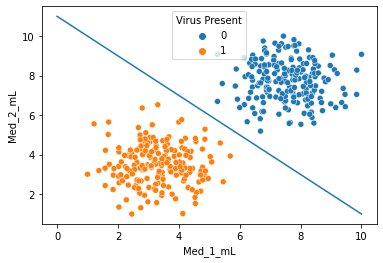

In [6]:
# Let's first visualize the data with a scatterplot
sns.scatterplot(data=df, x='Med_1_mL', y='Med_2_mL', hue='Virus Present')

# HYPERPLANE:
x = np.linspace(0, 10, 100)
m = -1
b = 11

y = m*x + b

plt.plot(x, y)

In [7]:
from sklearn.svm import SVC # Import Support Vector Classifier


In [8]:
y = df['Virus Present']

In [9]:
X = df.drop('Virus Present', axis=1)

In [10]:
X

,Med_1_mL,Med_2_mL
0,6.508231,8.582531
1,4.126116,3.073459
2,6.427870,6.369758
3,3.672953,4.905215
4,1.580321,2.440562
...,...,...
395,2.884122,3.271748
396,7.290855,9.488672
397,7.895325,8.272529
398,2.690592,2.674979


In [13]:
model = SVC(kernel='linear', C=1000) # Since we add a kernel, it becomes a SVM

In [14]:
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [15]:
from svm_margin_plot import plot_svm_boundary

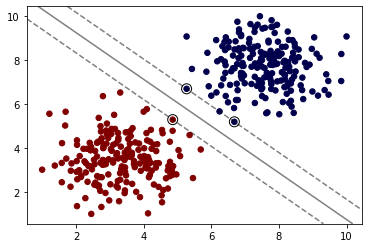

In [17]:
plot_svm_boundary(model,X,y) # This is with a very high C value

In [18]:
model_2 = SVC(kernel='linear', C=1) # Since we add a kernel, it becomes a SVM

In [19]:
model_2.fit(X,y)

SVC(C=1, kernel='linear')

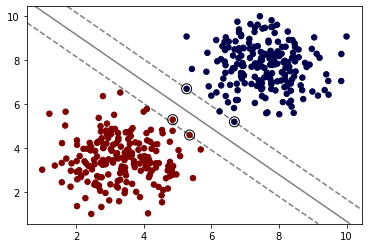

In [20]:
plot_svm_boundary(model_2, X, y)

### C effects:

- If you set C close to zero, you will allow a lot of points to be within the margin

In [21]:
model_3 = SVC(kernel='linear', C=0.05)
model_3.fit(X,y)

SVC(C=0.05, kernel='linear')

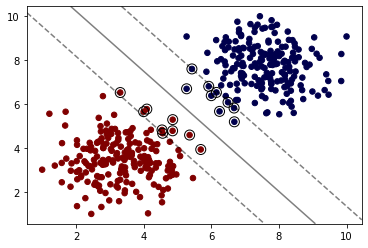

In [22]:
plot_svm_boundary(model_3, X, y)

- You will perform a sort cross validation grid search to determine which is the best C value.

### With Radial Basis Function Kernel (RBF):

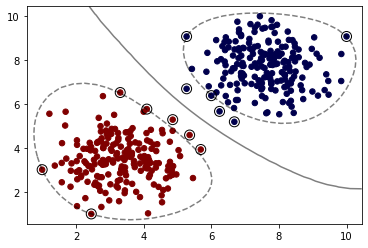

In [23]:
model = SVC(kernel='rbf', C=1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

### Gamma parameter:

- Determines how much influence does a single point has. 

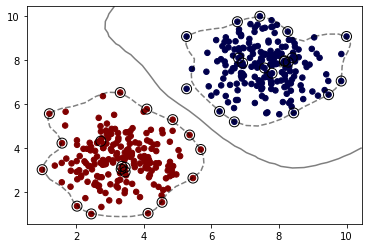

In [24]:
model = SVC(kernel='rbf', C=1, gamma='auto')
model.fit(X,y)
plot_svm_boundary(model,X,y)

The model above picked up much more noise from the data.

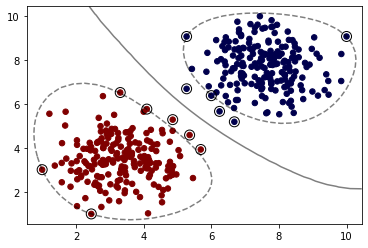

In [25]:
model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X,y)
plot_svm_boundary(model,X,y)

The model above uses scale as gamma parameter, this is the most balanced one.

### Sigmoid Kernel:

- It doesn't perform too good in this dataset. It relies to much on many points as Support Vectors.

In [26]:
model = SVC(kernel='sigmoid')
model.fit(X,y)

SVC(kernel='sigmoid')

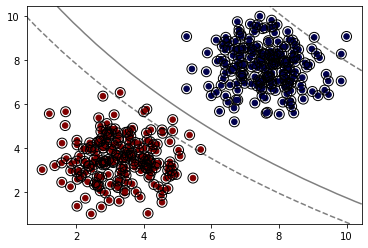

In [27]:
plot_svm_boundary(model,X,y)

### Polynomial Kernel:

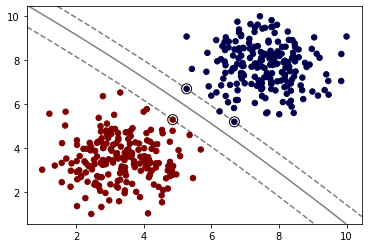

In [28]:
model = SVC(kernel='poly', degree=4, C=0.05)
model.fit(X,y)
plot_svm_boundary(model,X,y)

### Grid Search CV:

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
svm = SVC()

In [31]:
param_grid = {'C':[0.01, 0.1, 1], 'kernel':['linear', 'rbf']}

In [32]:
grid = GridSearchCV(svm, param_grid=param_grid)

In [33]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [34]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}